In [146]:
import numpy as np
from matplotlib import pyplot as plt
import pyvista as pv


/Users/gyakusu/Library/Python/3.9/lib/python/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

cannot import name 'vtk' from 'trame.widgets' (/Users/gyakusu/Library/Python/3.9/lib/python/site-packages/trame/widgets/__init__.py)

Falling back to a static output.
  warnings.warn(


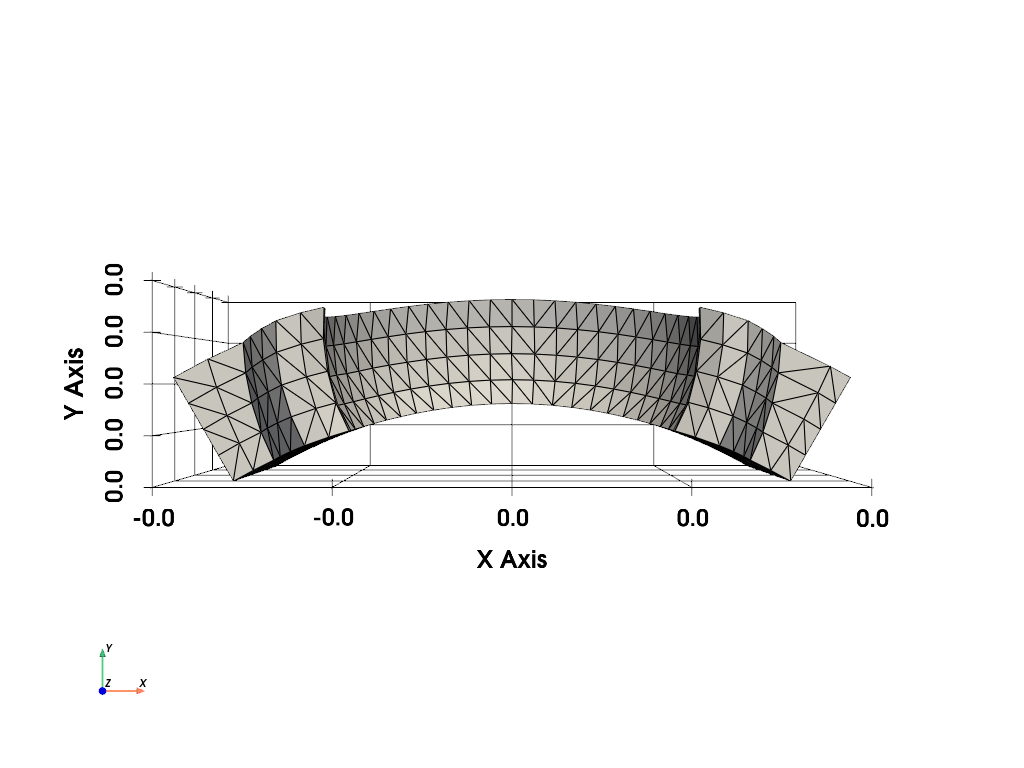

In [39]:
# ファイル名を指定してデータを読み込む
mesh = pv.read('../data/Tetra_Cells30000/Tetra_Cells30000_4_0.vtu')

# メッシュデータを表示する
mesh.plot(show_edges=True, show_grid=True, color='w', cpos='xy')


In [103]:
mesh.cells_dict

{5: array([[  0,   1,   2],
        [  3,   4,   5],
        [  6,   3,   5],
        ...,
        [705, 725, 726],
        [726, 694, 685],
        [726, 685, 705]])}

In [72]:
points = np.array(mesh.points.tolist()) 
points.shape


(727, 3)

In [73]:
z_distance = np.linalg.norm(points[:,0:2], axis=1)
z_distance.shape


(727,)

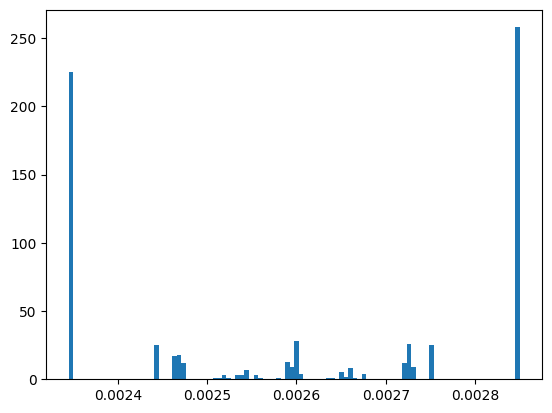

In [74]:
plt.hist(z_distance, bins=100)
plt.show()


In [88]:
mask = z_distance<0.00245
wall = points[mask]
wall.shape


(250, 3)

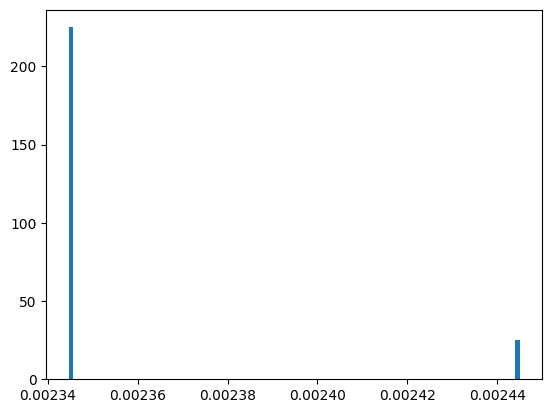

In [89]:
plt.hist(z_distance[mask], bins=100)
plt.show()


In [90]:
l = np.arctan2(wall[:,0], wall[:,1]) * 0.002345
l.max(), l.min()


(0.0012278392002470584, -0.0012278392364995481)

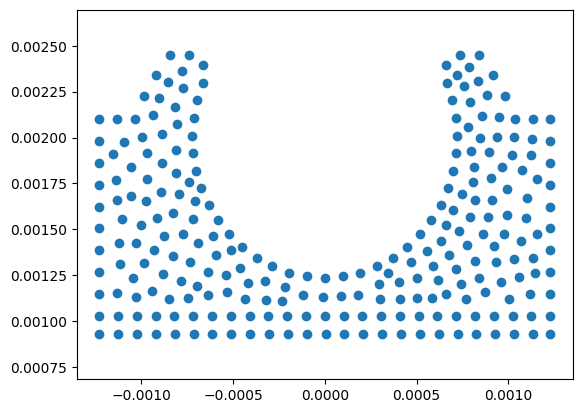

In [91]:
plt.plot(l, wall[:,2], 'o')
plt.axis('equal')
plt.show()



In [112]:
lz = np.array([l, wall[:,2]]).T
lz.shape


(250, 2)

In [127]:
Olz_temp = np.array([0, 0.0020])
Olz_temp_dist = np.linalg.norm(lz - Olz_temp, axis=1)
Olz_temp_dist.shape


(250,)

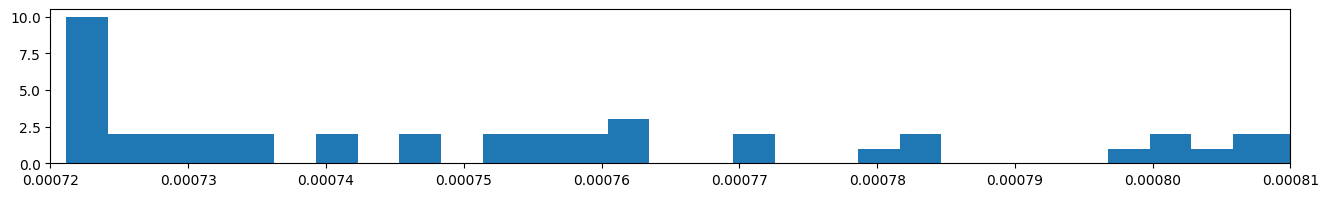

In [136]:
plt.figure(figsize=(16,2))
plt.hist(Olz_temp_dist, bins=300)
plt.xlim([0.00072, 0.00081])
plt.show()


In [137]:
lz_edge = lz[Olz_temp_dist<0.000765]
lz_edge.shape


(31, 2)

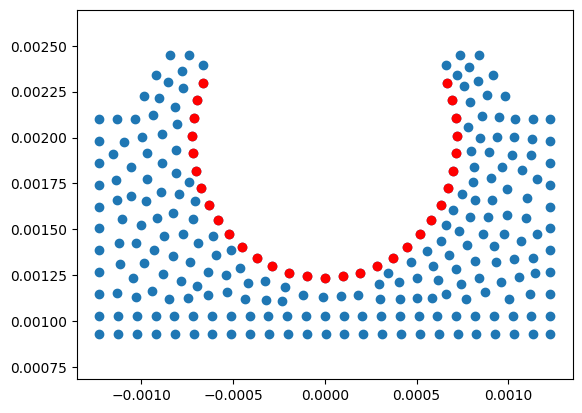

In [138]:
plt.plot(l, wall[:,2], 'o')
plt.plot(lz_edge[:,0], lz_edge[:,1], 'ro')
plt.axis('equal')
plt.show()



In [142]:
import numpy as np
from scipy.optimize import minimize

# Define the objective function
def objective(x):
    # Calculate the distances between Olz_temp and lz_edge
    distances = np.linalg.norm([0,x[0]] - lz_edge, axis=1)
    # Calculate the variance of the distances
    variance = np.var(distances)
    return variance

# Define the initial guess for Olz_temp
x0 = Olz_temp[1]

# Perform the optimization
result = minimize(objective, x0)

# Get the optimized point
Olz = np.array([0, result.x[0]])
Olz


array([0.        , 0.00198778])

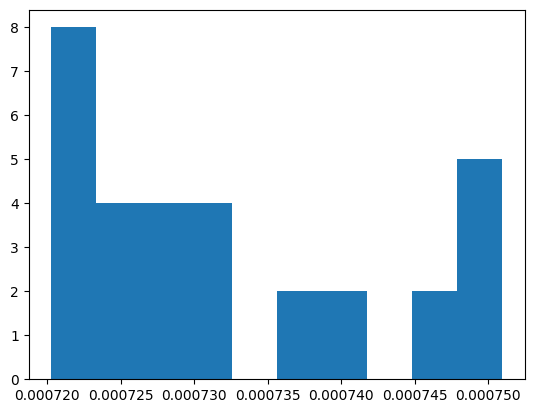

In [145]:
Olz_dist = np.linalg.norm(lz_edge - Olz, axis=1)
plt.hist(Olz_dist, bins=10)
plt.show()

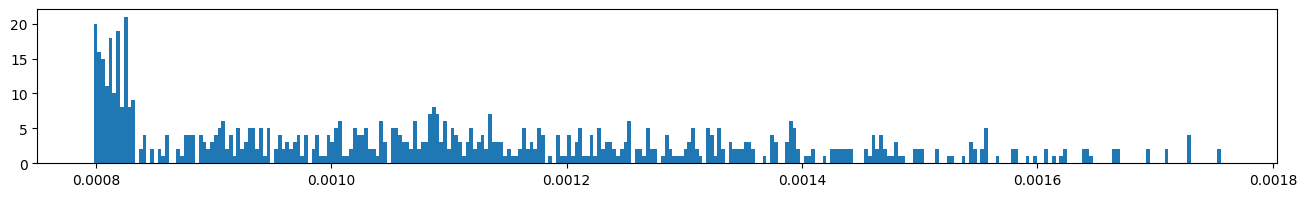

In [152]:
Oxyz_temp = np.array([0, 0.0026, 0.0020])
Oxyz_temp_dist = np.linalg.norm(points - Oxyz_temp, axis=1)

plt.figure(figsize=(16,2))
plt.hist(Oxyz_temp_dist, bins=300)
plt.show()


(-0.001567499659722671,
 0.0015675000089686365,
 0.0008539999776985496,
 0.0025260000315029175)

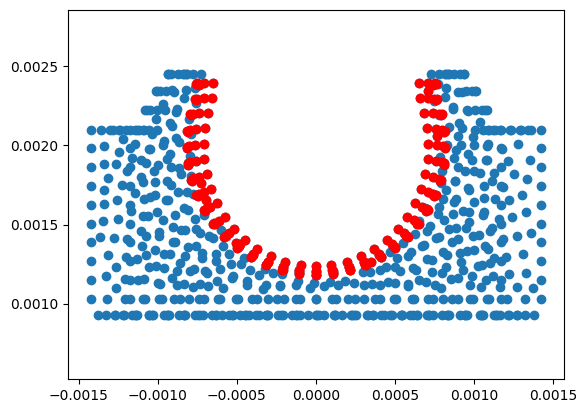

In [157]:
Oxyz_temp_face = points[Oxyz_temp_dist<0.00087]

plt.plot(points[:,0], points[:,2], 'o')
plt.plot(Oxyz_temp_face[:,0], Oxyz_temp_face[:,2], 'ro')
plt.axis('equal')


In [160]:
def objective2(x):
    # Calculate the distances between Oxyz_temp and Oxyz_temp_face
    distances = np.linalg.norm([0,x[0],x[1]] - Oxyz_temp_face, axis=1)
    # Calculate the variance of the distances
    variance = np.var(distances) * 1e6
    return variance

# Define the initial guess for Oxyz_temp
x0 = Oxyz_temp[1:]

# Perform the optimization
result = minimize(objective2, x0)

# Get the optimized point
Oxyz = np.array([0, result.x[0], result.x[1]])
Oxyz


array([0.        , 0.00263586, 0.0020071 ])